In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:

# gaussian = norm(loc=0.0, scale=1)
# X = gaussian.rvs(10)


gaussian = norm(loc=0.5, scale=0.2)
X = gaussian.rvs(500)

grid = np.linspace(-0.1, 1.1, 1000)


In [3]:
grid[1]

-0.0987987987987988

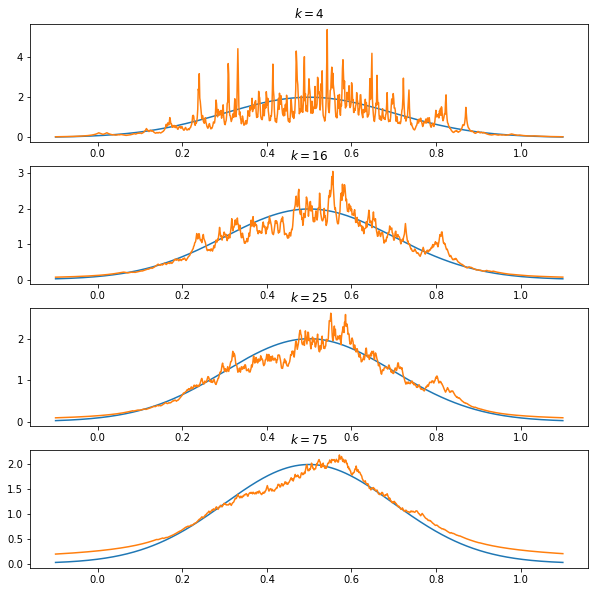

In [5]:

# Ks = [4,10,60]
Ks = [4, 16, 25, 75]

fig, axes = plt.subplots(len(Ks),1, figsize=(10,10))

for i, ax in enumerate(axes.flat):
    
    # choose K value
    K = Ks[i]
    
    # run knn density estimation with chosen K
    p = np.zeros_like(grid)
    n = X.shape[0]
    for i, x in enumerate(grid):
        dists = np.abs(X-x) #gets the distance between point x and all of other X 
        neighbours = dists.argsort() # returns a  array of indices of srted distance
        neighbour_K = neighbours[K] ## the the neighbor kth nearest neighbor away

        p[i] = (K/n) * 1/(2* dists[neighbour_K]) # (number of nearest neighbors / sample size) * 1 / ( 2 * the distance way of k neighbor) 
        
    # True dist
    ax.plot(grid, gaussian.pdf(grid))
    
    # plot density estimate
    ax.plot(grid, p)
    
    ax.set_title(f'$k={K}$')
# plt.savefig("knn-density_est.png", dpi=300)
plt.show()